#### Name: Mukund Tamizharasan
#### USC ID: 7355725345

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Reading the .dat file into pandas dataframe

In [2]:
col_names = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle',
             'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis',
             'label']
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', header=None, sep="\s+", names=col_names)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


### Changing the label: AB to 1s and NO to 0s

In [3]:
df['label']=df['label'].replace('AB',1)
df['label']=df['label'].replace('NO',0)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### 1. (b) i. Pairplot between all independent features

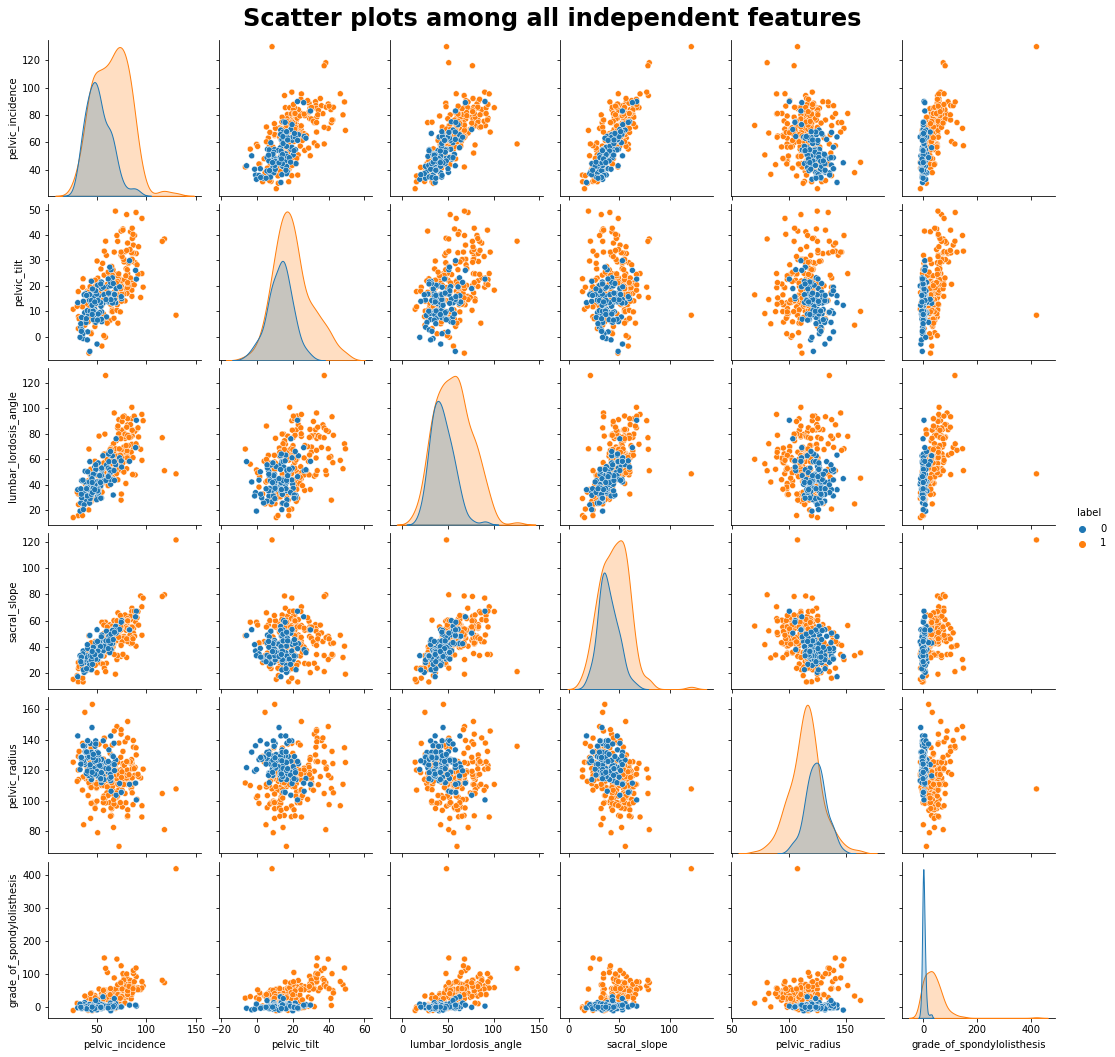

In [4]:
pairplot=sns.pairplot(df,hue='label')
plt.subplots_adjust(top=0.95)
pairplot.fig.suptitle("Scatter plots among all independent features", size=24, weight="bold")
plt.show()

### 1. (b) ii. Boxplot of all independent variables

<ipython-input-5-f2154cf671ac>:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(top=0.95)


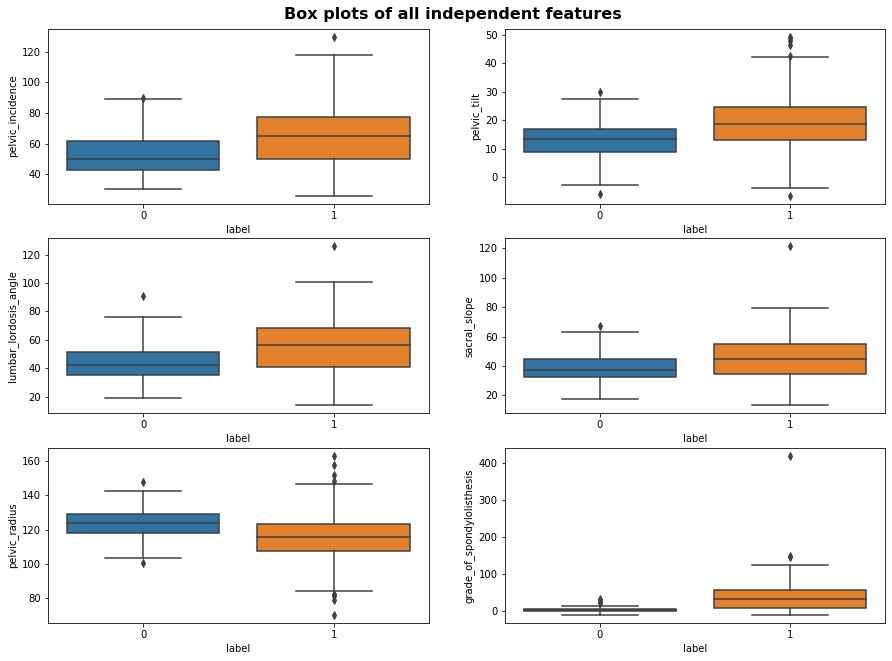

In [5]:
f, ax = plt.subplots(3,2,figsize=(15,10),constrained_layout=True)
plt.subplots_adjust(top=0.95)
f.suptitle("Box plots of all independent features", size=16, weight="bold")

sns.boxplot(y="pelvic_incidence",x="label",data=df,orient='v',ax=ax[0][0])
sns.boxplot(y="pelvic_tilt",x="label",data=df,orient='v',ax=ax[0][1])
sns.boxplot(y="lumbar_lordosis_angle",x="label",data=df,orient='v',ax=ax[1][0])
sns.boxplot(y="sacral_slope",x="label",data=df,orient='v',ax=ax[1][1])
sns.boxplot(y="pelvic_radius",x="label",data=df,orient='v',ax=ax[2][0])
sns.boxplot(y="grade_of_spondylolisthesis",x="label",data=df,orient='v',ax=ax[2][1])
plt.show()

### 1. (b) iii. Creating train dataframe

In [6]:
train_1 = df[df['label'] == 1].iloc[:140,:]
train_0 = df[df['label'] == 0].iloc[:70,:]
train = train_0.append(train_1, ignore_index = True)
train = train.sample(frac=1).reset_index(drop=True)
train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.83,20.36,54.55,43.47,112.31,-0.62,1
1,49.83,16.74,28.00,33.09,121.44,1.91,0
2,65.01,9.84,57.74,55.18,94.74,49.70,1
3,41.17,17.32,33.47,23.85,116.38,-9.57,1
4,54.75,9.75,48.00,45.00,123.04,8.24,0
...,...,...,...,...,...,...,...
205,72.05,24.70,79.87,47.35,107.17,56.43,1
206,86.04,38.75,47.87,47.29,122.09,61.99,1
207,34.65,7.51,43.00,27.14,123.99,-4.08,0
208,77.69,21.38,64.43,56.31,114.82,26.93,1


### 1. (b) iii. Creating test dataframe

In [7]:
test_1 = df[df['label'] == 1].iloc[140:,:]
test_0 = df[df['label'] == 0].iloc[70:,:]
test = test_0.append(test_1, ignore_index = True)
test = test.sample(frac=1).reset_index(drop=True)
test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,83.70,20.27,77.11,63.43,125.48,69.28,1
1,87.68,20.37,93.82,67.31,120.94,76.73,1
2,50.68,6.46,35.00,44.22,116.59,-0.21,0
3,45.08,12.31,44.58,32.77,147.89,-8.94,0
4,95.48,46.55,59.00,48.93,96.68,77.28,1
...,...,...,...,...,...,...,...
95,33.04,-0.32,19.07,33.37,120.39,9.35,0
96,74.57,15.72,58.62,58.84,105.42,0.60,0
97,118.14,38.45,50.84,79.70,81.02,74.04,1
98,53.94,20.72,29.22,33.22,114.37,-0.42,0


### Converting dataframe into array

In [8]:
scaler = StandardScaler()
x_train = train.iloc[:,:-1].values
scaler.fit(x_train)
# x_train = scaler.transform(x_train)

y_train = train.iloc[:,-1].values

x_test = test.iloc[:,:-1].values
# x_test = scaler.transform(x_test)

y_test = test.iloc[:,-1].values

### Defining the error for KNN

In [9]:
def error(y,y_pred):
    acc = 0
    for i in range(len(y)):
        if y[i]!=y_pred[i]:
            acc+=1
    return acc/len(y)

### 1. (c) ii. Test all the data in the test database with k nearest neighbors

In [10]:
kinv_list = []
k_list = []
train_er_list = []
test_er_list = []

for i in range(208,0,-3):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list.append(test_error)
    
    kinv_list.append(1/i)
    k_list.append(i)

1/k for which test error is minimum: 4
Minimum test error: 0.06
1/k for which train error is minimum: 1
Minimum train error: 0.0


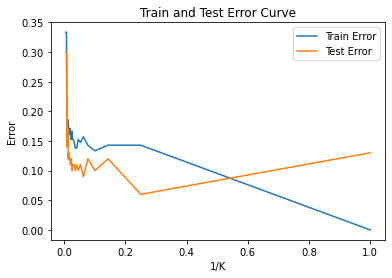

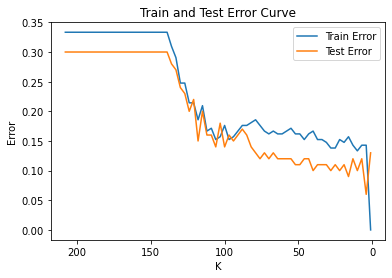

In [11]:
plt.title("Train and Test Error Curve")
plt.plot(kinv_list,train_er_list,label="Train Error")
plt.plot(kinv_list,test_er_list,label="Test Error")
plt.xlabel("1/K")
plt.ylabel("Error")
plt.legend()

plt.figure()
plt.title("Train and Test Error Curve")
plt.plot(k_list,train_er_list,label="Train Error")
plt.plot(k_list,test_er_list,label="Test Error")
plt.xlabel("K")
plt.ylabel("Error")
plt.xlim(max(k_list)+10, min(k_list)-10)
plt.legend()

print("1/k for which test error is minimum:",k_list[test_er_list.index(min(test_er_list))])
print("Minimum test error:",min(test_er_list))
print("1/k for which train error is minimum:",k_list[train_er_list.index(min(train_er_list))])
print("Minimum train error:",min(train_er_list))

From the 1/k vs test error graph, we can see that 1/k=0.25, k=4 has the least test error. It is the most suitable k.

Training Set Confusion Matrix
[[ 64   6]
 [ 24 116]]

Training Set Statistics
Precision: 0.9508196721311475
True Positive Rate: 0.8285714285714286
True Negative Rate: 0.9142857142857143
F1 Score: 0.885496183206107

Test Set Confusion Matrix
[[25  5]
 [ 1 69]]

Test Set Statistics
Precision: 0.9324324324324325
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
F1 Score: 0.9583333333333333


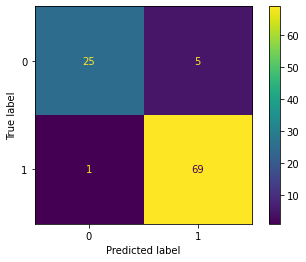

In [12]:
#k=4
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)
ytrain_pred = neigh.predict(x_train)
ytest_pred = neigh.predict(x_test)

conf_matrix_train = confusion_matrix(y_train ,ytrain_pred)
tn_train = conf_matrix_train[0][0]
fn_train = conf_matrix_train[1][0]
tp_train = conf_matrix_train[1][1]
fp_train = conf_matrix_train[0][1]
true_positive_rate_train = tp_train/(tp_train+fn_train)
true_negative_rate_train = tn_train/(tn_train+fp_train)
precision_train = tp_train/(tp_train+fp_train)
fscore_train = (2*precision_train*true_positive_rate_train)/(precision_train+true_positive_rate_train)

conf_matrix_test = confusion_matrix(y_test ,ytest_pred)
tn_test = conf_matrix_test[0][0]
fn_test = conf_matrix_test[1][0]
tp_test = conf_matrix_test[1][1]
fp_test = conf_matrix_test[0][1]
true_positive_rate_test = tp_test/(tp_test+fn_test)
true_negative_rate_test = tn_test/(tn_test+fp_test)
precision_test = tp_test/(tp_test+fp_test)
fscore_test = (2*precision_test*true_positive_rate_test)/(precision_test+true_positive_rate_test)

print("Training Set Confusion Matrix")
print(conf_matrix_train)
print()
print("Training Set Statistics")
print("Precision:",precision_train)
print("True Positive Rate:",true_positive_rate_train)
print("True Negative Rate:",true_negative_rate_train)
print("F1 Score:",fscore_train)
print()
print("Test Set Confusion Matrix")
print(conf_matrix_test)
print()
print("Test Set Statistics")
print("Precision:",precision_test)
print("True Positive Rate:",true_positive_rate_test)
print("True Negative Rate:",true_negative_rate_test)
print("F1 Score:",fscore_test)

disp = ConfusionMatrixDisplay(conf_matrix_test)
disp.plot()

### 1. (c) iii. Learning Curve

In [13]:
info_dict = dict()
for n in range(10,211,10):
    train_sub_0 = train_0.iloc[:n//3,:]
    train_sub_1 = train_1.iloc[:(n-n//3),:]
    train_sub = train_sub_0.append(train_sub_1, ignore_index=True)
    
    x_train_sub = train_sub.iloc[:,:-1].values
    y_train_sub = train_sub.iloc[:,-1].values
    
    k_list = []
    test_er_list = []
    for k in range(1,n,5):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(x_train_sub, y_train_sub)
        ytest_pred = neigh.predict(x_test)
        test_error = error(y_test,ytest_pred)
        k_list.append(k)
        test_er_list.append(test_error)
    info_dict[n]={"k":k_list,"test_error":test_er_list,"optimal_k":k_list[np.argmin(test_er_list)],
                  "best_test_error":min(test_er_list)}
    
info_dict      

{10: {'k': [1, 6],
  'test_error': [0.25, 0.33],
  'optimal_k': 1,
  'best_test_error': 0.25},
 20: {'k': [1, 6, 11, 16],
  'test_error': [0.22, 0.2, 0.29, 0.3],
  'optimal_k': 6,
  'best_test_error': 0.2},
 30: {'k': [1, 6, 11, 16, 21, 26],
  'test_error': [0.22, 0.24, 0.26, 0.26, 0.3, 0.3],
  'optimal_k': 1,
  'best_test_error': 0.22},
 40: {'k': [1, 6, 11, 16, 21, 26, 31, 36],
  'test_error': [0.76, 0.3, 0.25, 0.26, 0.3, 0.3, 0.3, 0.3],
  'optimal_k': 11,
  'best_test_error': 0.25},
 50: {'k': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
  'test_error': [0.78, 0.68, 0.38, 0.31, 0.31, 0.3, 0.3, 0.3, 0.3, 0.3],
  'optimal_k': 26,
  'best_test_error': 0.3},
 60: {'k': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56],
  'test_error': [0.74,
   0.73,
   0.56,
   0.54,
   0.29,
   0.3,
   0.3,
   0.3,
   0.3,
   0.3,
   0.3,
   0.3],
  'optimal_k': 21,
  'best_test_error': 0.29},
 70: {'k': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66],
  'test_error': [0.72,
   0.69,
   0.56,
   0.57,


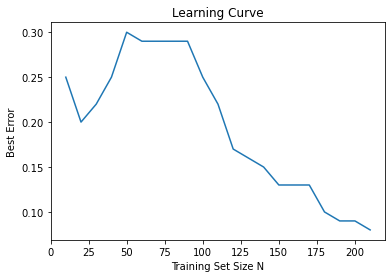

In [14]:
N = []
best_test_error = []
for i in info_dict.keys():
    N.append(i)
    best_test_error.append(info_dict[i]['best_test_error'])

plt.plot(N,best_test_error)
plt.title("Learning Curve")
plt.xlabel("Training Set Size N")
plt.ylabel("Best Error")
plt.show()

### 1. (d) Replace the Euclidean metric with different metrics

In [15]:
k_list = []
train_er_list_manhattan = []
train_er_list_chebyshev = []
train_er_list_mahalanobis = []
test_er_list_manhattan = []
test_er_list_chebyshev = []
test_er_list_mahalanobis = []
best_error_dict={}
best_k_dict={}

for i in range(1,200,5):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_manhattan.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_manhattan.append(test_error)
    
    neigh = KNeighborsClassifier(n_neighbors=i, metric="chebyshev")
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_chebyshev.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_chebyshev.append(test_error)
    
    neigh = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'V': np.cov(x_train,rowvar=False)})
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_mahalanobis.append(train_error)
    
    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_mahalanobis.append(test_error)
    
    k_list.append(i)

best_error_dict["manhattan"]=min(test_er_list_manhattan)
best_error_dict["chebyshev"]=min(test_er_list_chebyshev)
best_error_dict["mahalanobis"]=min(test_er_list_mahalanobis)
best_k_dict["manhattan"]=k_list[test_er_list_manhattan.index(min(test_er_list_manhattan))]
best_k_dict["chebyshev"]=k_list[test_er_list_chebyshev.index(min(test_er_list_chebyshev))]
best_k_dict["mahalanobis"]=k_list[test_er_list_mahalanobis.index(min(test_er_list_mahalanobis))]


print("K for minimum test error using Manhattan distance:",k_list[test_er_list_manhattan.index(min(test_er_list_manhattan))])
print("Minimum test error with Manhattan distance:",min(test_er_list_manhattan))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

K for minimum test error using Manhattan distance: 6
Minimum test error with Manhattan distance: 0.11


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [16]:
logp=np.arange(0.1,1.1,0.1)
p=[]
train_er_list_minkowski = []
test_er_list_minkowski = []
logp_df = pd.DataFrame(columns=["p","logp","Train Error","Test Error"])
df_idx=0
for x in logp:
    p.append(10**x)

for idx in range(len(p)):
    neigh = KNeighborsClassifier(n_neighbors=6, metric="minkowski",p=p[idx])
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_minkowski.append(train_error)
    
    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_minkowski.append(test_error)
    
    logp_df.loc[df_idx]=[p[idx],logp[idx],train_error,test_error]
    df_idx+=1

best_error_dict["minkowski"]=min(test_er_list_minkowski)
best_k_dict["minkowski"]=6

print("Statistics for K=6")
logp_df

Statistics for K=6


,p,logp,Train Error,Test Error
0,1.258925,0.1,0.138095,0.09
1,1.584893,0.2,0.147619,0.09
2,1.995262,0.3,0.152381,0.08
3,2.511886,0.4,0.152381,0.08
4,3.162278,0.5,0.147619,0.08
5,3.981072,0.6,0.152381,0.06
6,5.011872,0.7,0.152381,0.07
7,6.309573,0.8,0.147619,0.08
8,7.943282,0.9,0.147619,0.09
9,10.000000,1.0,0.133333,0.09


Since the test error is least for logp=0.6, logp=0.6 is the best logp

In [17]:
distances=["manhattan","minkowski","chebyshev","mahalanobis"]
summary_df = pd.DataFrame(columns=["Distance Metric","Best Test Error","Best K"])
df_idx=0
for dist in distances:
    summary_df.loc[df_idx]=[dist.capitalize(),best_error_dict[dist],best_k_dict[dist]]
    df_idx+=1
summary_df

,Distance Metric,Best Test Error,Best K
0,Manhattan,0.11,6
1,Minkowski,0.06,6
2,Chebyshev,0.08,16
3,Mahalanobis,0.17,1


### 1. (e) Majority Polling

In [18]:
k_list = []
train_er_list_euclidean = []
train_er_list_manhattan = []
train_er_list_chebyshev = []
test_er_list_euclidean = []
test_er_list_manhattan = []
test_er_list_chebyshev = []
best_error_dict={}
best_k_dict={}

for i in range(1,200,5):
    neigh = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_euclidean.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_euclidean.append(test_error)
    
    neigh = KNeighborsClassifier(n_neighbors=i, metric="manhattan", weights='distance')
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_manhattan.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_manhattan.append(test_error)
    
    neigh = KNeighborsClassifier(n_neighbors=i, metric="chebyshev", weights='distance')
    neigh.fit(x_train, y_train)
    ytrain_pred = neigh.predict(x_train)
    train_error = error(y_train,ytrain_pred)
    train_er_list_chebyshev.append(train_error)

    ytest_pred = neigh.predict(x_test)
    test_error = error(y_test,ytest_pred)
    test_er_list_chebyshev.append(test_error)
    
    k_list.append(i)
    
best_error_dict["manhattan"]=min(test_er_list_manhattan)
best_error_dict["chebyshev"]=min(test_er_list_chebyshev)
best_error_dict["euclidean"]=min(test_er_list_euclidean)
best_k_dict["manhattan"]=k_list[test_er_list_manhattan.index(min(test_er_list_manhattan))]
best_k_dict["chebyshev"]=k_list[test_er_list_chebyshev.index(min(test_er_list_chebyshev))]
best_k_dict["euclidean"]=k_list[test_er_list_euclidean.index(min(test_er_list_euclidean))]

In [19]:
distances=["manhattan","chebyshev","euclidean"]
summary_df = pd.DataFrame(columns=["Distance Metric","Best Test Error","Best K"])
df_idx=0
for dist in distances:
    summary_df.loc[df_idx]=[dist.capitalize(),best_error_dict[dist],best_k_dict[dist]]
    df_idx+=1
summary_df

,Distance Metric,Best Test Error,Best K
0,Manhattan,0.10,26
1,Chebyshev,0.11,16
2,Euclidean,0.10,6


### 1. (f) Lowest Training Error

The lowest training error obtained is 0 for K=1.